In [56]:
import os
import sys
from pathlib import Path

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
SRC_ROOT = Path(r"F:\hushuhan")
CSV_ROOT = SRC_ROOT / "biaoge"

In [50]:
csv_files = os.listdir(str(CSV_ROOT))
for csv in csv_files:
    csv_file = CSV_ROOT / csv
    dir_name = csv_file.stem[:5]
    IMAGE_DIR = SRC_ROOT / dir_name
    image_set = pd.read_csv(csv_file)
    image_set["Image_Path"] = IMAGE_DIR / image_set["Image"]
    for index, row in image_set.iterrows():
        image_path = row["Image_Path"]
        label = row["Label"]
        label_number = row["Label_Number"]
        print(index, image_path, label, label_number)        
        break
    # print(image_set.head(5))
    break

0 F:\hushuhan\set_1\shoubiao_n04555897_17895.JPEG shoubiao 13


In [67]:
def getImage(img_dir, index):
    csv_file = CSV_ROOT / f"{img_dir}_labels.csv"
    df = pd.read_csv(csv_file)
    image_dir = SRC_ROOT / img_dir
    df["Image_Path"] = image_dir / df["Image"]
    if index >= len(df):
        raise IndexError("index is out of range")
    item = df.iloc[index]
    # print(item["Image_Path"])
    # image_path = item["Image_Path"]
    # print(image_path)
    img = cv2.imread(item["Image_Path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # print(img.shape)
    return img, item["Label"], item["Label_Number"]


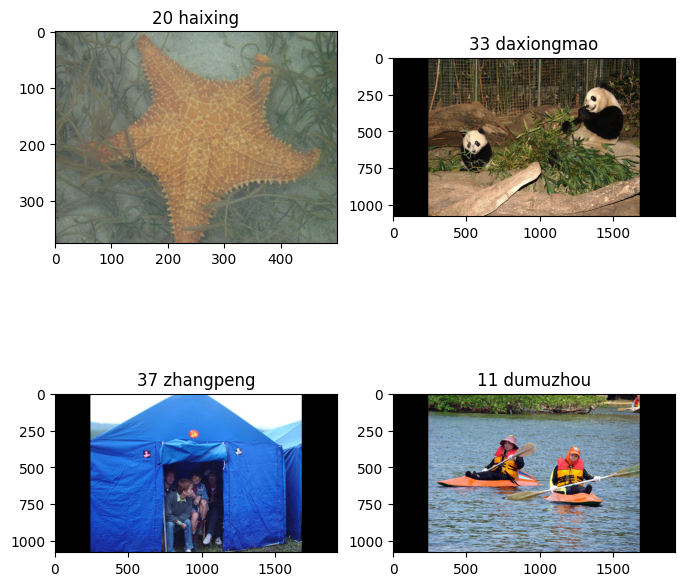

In [72]:
index_list = "4 5 6 7"
imgs = []
labels = []
label_numbers = []
for i in index_list.split():
    img, label, label_number = getImage("set_1", int(i))
    imgs.append(img)
    labels.append(label)
    label_numbers.append(label_number)
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.title(f"{label_numbers[0]} {labels[0]}")
plt.imshow(imgs[0])
plt.subplot(2, 2, 2)
plt.title(f"{label_numbers[1]} {labels[1]}")
plt.imshow(imgs[1])
plt.subplot(2, 2, 3)
plt.title(f"{label_numbers[2]} {labels[2]}")
plt.imshow(imgs[2])
plt.subplot(2, 2, 4)
plt.title(f"{label_numbers[3]} {labels[3]}")
plt.imshow(imgs[3])
plt.show()

In [48]:
img = cv2.imread(r"F:\hushuhan\set_1\gangqin_n03452741_2325.JPEG")
img.shape

(1080, 1920, 3)

In [91]:
set_group = []
for start in range(1,501,25):
    group1 = (start, start+11)
    group2 = (start+12, start+24)
    set_group.append(group1)
    set_group.append(group2)
with open("group.md", "w") as f:
    f.write("# 脑电实验 Todo List\n\n")
    for index, group in enumerate(set_group):
        f.write(f"- [ ] [{index+1}]{group[0]}-{group[1]}\n")
        if (index+1) % 8 == 0:
            f.write("\n")